# Chapter 10: Clustering 
# By: Parisa Hormozzadeh
Clustering is an unsupervised learning technique used to group similar data points.

---

## Clustering vs Classification
- Classification uses labeled data to assign classes.
- Clustering finds groups in unlabeled data.

---

# 1. Load Data

In [19]:
import pandas as pd

data_set = pd.read_csv('power_consumption.csv')
data_set

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low


# 2. Preprocessing 

## 2.1. Feature Engineering

Transforming Datetime into usable features.

In [20]:
data_set['Datetime'] = pd.to_datetime(data_set['Datetime'])

data_set['Hour'] = data_set['Datetime'].dt.hour
data_set['DayOfWeek'] = data_set['Datetime'].dt.dayofweek
data_set['Month'] = data_set['Datetime'].dt.month
data_set  = data_set.drop('Datetime' , axis=1)
data_set

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory,Hour,DayOfWeek,Month
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low,0,6,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low,0,6,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low,0,6,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low,0,6,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High,23,5,12
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low,23,5,12
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low,23,5,12
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low,23,5,12


### For Clustering (Unsupervised Learning):
The goal is to find natural groupings in the data without labels.

Since we don’t have ground truth labels, there’s no formal "train/test" split in the traditional sense.

Instead, we might:
Train on the entire dataset to discover clusters.
Later, use external validation (like comparing with PowerDemandCategory or interpreting cluster centroids).

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1', 'Hour', 'DayOfWeek', 'Month']
X = data_set[features]


## 2.2. Handling Missing Values

In [22]:
mean_values_Temperature = X['Temperature'].mean()
min_values_WindSpeed = X['WindSpeed'].min()

X['Temperature'] = X['Temperature'].fillna(mean_values_Temperature)
X['WindSpeed'] = X['WindSpeed'].fillna(min_values_WindSpeed)

X.isnull().sum()

c:\Users\Parisa Joon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\Parisa Joon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
Hour                      0
DayOfWeek                 0
Month                     0
dtype: int64

## 2.3. Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means Clustering
- Partitions data into k clusters minimizing within-cluster variance.
- Uses centroid (mean) of points in each cluster.
- Sensitive to outliers.

---

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(X_scaled)

labels = kmeans.labels_


## 3.1. Silhouette Score


##### a(i) = Average distance between point i and all other points in the same cluster. (This measures how tightly packed the cluster is.)
##### b(i) = Average distance between point i and points in the nearest different cluster. (This measures how far it is from the closest other cluster.)

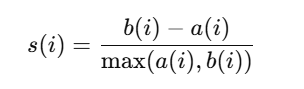

If s(i) ≈ 1, it means the point is far from other clusters and well-matched to its own.

If s(i) ≈ 0, it’s on the boundary between clusters.

If s(i) < 0, it might be in the wrong cluster.



In [28]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette:.4f}')

Silhouette Score: 0.2286


## 3.2. Elbow Method to Determine Optimal K

c:\Users\Parisa Joon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  if __name__ == "__main__":


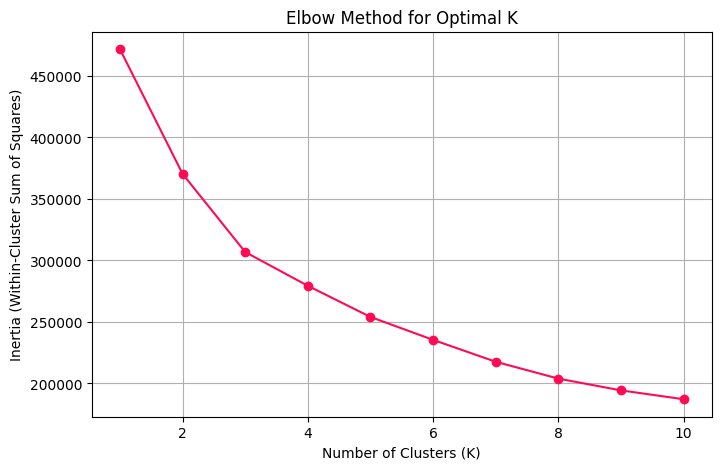

In [30]:
list1 = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    list1.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, list1, 'bo-' , color='#FF0B55')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


Based on the elbow plot, the optimal number of clusters (K) is around 3 or 4. 

## 3.3. Combine Elbow and Silhouette to Find Optimal K

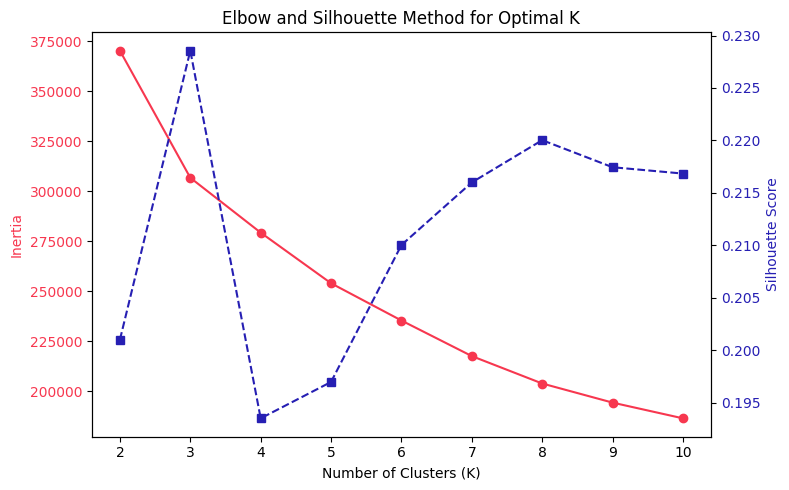

In [31]:
inertia = []
silhouette = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=2)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color='#F7374F')
ax1.plot(K_range, inertia, 'o-', color='#F7374F', label='Inertia')
ax1.tick_params(axis='y', labelcolor='#F7374F')

ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette Score', color='#261FB3')
ax2.plot(K_range, silhouette, 's--', color='#261FB3', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='#261FB3')

plt.title('Elbow and Silhouette Method for Optimal K')
fig.tight_layout()
plt.show()


## 3.4. Clustered Data Mapped to PowerDemandCategory Feature

### Clustered data to categories which represent label of classification PowerDemandCategory (Low / High)

In [34]:
# Fit KMeans with 2 clusters (Low and High)
kmeans = KMeans(n_clusters=2, random_state=2)
data_set['Cluster'] = kmeans.fit_predict(X_scaled)
data_set

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory,Hour,DayOfWeek,Month,Cluster
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low,0,6,1,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low,0,6,1,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low,0,6,1,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low,0,6,1,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High,23,5,12,0
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low,23,5,12,1
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low,23,5,12,1
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low,23,5,12,1


## KMeans doesn’t know the real labels (High/Low)

### Trust the Majority Rule

In [41]:
print(data_set.groupby('Cluster')['PowerDemandCategory'].value_counts(normalize=True))

Cluster  PowerDemandCategory
0        High                   0.703837
         Low                    0.296163
1        Low                    0.901663
         High                   0.098337
Name: PowerDemandCategory, dtype: float64


 Since Cluster 0 contains ~70% High and Cluster 1 contains ~90% Low, we can assign:
##### Cluster 0 ≈ High and Cluster 1 ≈ Low for interpretation.

In [42]:
data_set['PowerDemandCategory_Num'] = data_set['PowerDemandCategory'].map({'Low': 1, 'High': 0})
data_set

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory,Hour,DayOfWeek,Month,Cluster,PowerDemandCategory_Num
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low,0,6,1,1,1
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low,0,6,1,1,1
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low,0,6,1,1,1
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low,0,6,1,1,1
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low,0,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High,23,5,12,0,0
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low,23,5,12,1,1
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low,23,5,12,1,1
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low,23,5,12,1,1


In [47]:
from sklearn.metrics import confusion_matrix

#Refer to Chapter 8 for a detailed explanation of this function.

def classification_metrics_table(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()

    precision_0 = TN / (TN + FN) * 100
    precision_1 = TP / (TP + FP) * 100

    recall_0 = TN / (TN + FP) * 100
    recall_1 = TP / (TP + FN) * 100

    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100

    metrics_table = pd.DataFrame({
        "Clustered High": [TN, FN, f"{precision_0:.2f}%"],
        "Clustered Low": [FP, TP, f"{precision_1:.2f}%"],
        "Recall (%)": [f"{recall_0:.2f}%", f"{recall_1:.2f}%", ""]
    }, index=["Actual High", "Actual Low", "Precision (%)"])
    metrics_table.loc[""] = ["", "", f"Accuracy: {accuracy:.2f}%"]
    
    return pd.DataFrame(metrics_table)

classification_metrics_table(confusion_matrix(data_set['PowerDemandCategory_Num'], data_set['Cluster']))

,Clustered High,Clustered Low,Recall (%)
Actual High,21826,2105,91.20%
Actual Low,9184,19301,67.76%
Precision (%),70.38%,90.17%,
,,,Accuracy: 78.46%
